In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

train_data = pd.read_csv('train.csv')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [2]:
# Data Cleaning
#
#from the above output we can see that we are missing 177 values in the age column,
#  687 from the Cabin column, and only 2 from the Embarked column. So long as the
#  number of missing values in the Cabin column is the same as the number of
#  passengers in third (3rd) class, that is fine
#
first_class = train_data[train_data['Pclass']==1]
second_class = train_data[train_data['Pclass']==2]
third_class = train_data[train_data['Pclass']==3]
print('train - number of first class passengers:',len(first_class))
print('train - number of second class passengers:',len(second_class))
print('train - number of third class passengers:',len(third_class))
steerage_passage = train_data[train_data['Cabin'].isnull()]
print('train - number of steerage passengers:',len(steerage_passage))
cabin_passage = train_data[train_data['Cabin'].notnull()]
print('train - number of cabin passengers:',len(cabin_passage))
#
#Since the number of steerage passengers is not equal to the number of third class
#  passengers, there are data inconsistencies. Therefore, we will ignore the values
#  in the cabin column. Instead, use 'Pclass'
#


train - number of first class passengers: 216
train - number of second class passengers: 184
train - number of third class passengers: 491
train - number of steerage passengers: 687
train - number of cabin passengers: 204


In [3]:
survival_by_class = train_data[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).agg(['count','sum','mean','var']).sort_values(by='Pclass', ascending=True)

In [4]:
survival_by_sex = train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).agg(['count','sum','mean','var']).sort_values(by='Sex', ascending=True)

In [5]:
#remember there are only 714 values in the age column
train_data['AgeBin'] = pd.cut(train_data['Age'],7)
survival_by_age_bracket = train_data[['AgeBin','Survived']].groupby(['AgeBin'], as_index=False).agg(['count','sum','mean','var']).sort_values(by='AgeBin', ascending=True)
# NOTE: the 'count' result is the total number of records in that bin, 'sum' represents total number of survivors
survival_by_age_bracket #for viewing

Survived                        
                    count sum      mean       var
AgeBin                                           
(0.34, 11.789]         68  39  0.573529  0.248244
(11.789, 23.157]      178  64  0.359551  0.231575
(23.157, 34.526]      233  93  0.399142  0.240861
(34.526, 45.894]      134  56  0.417910  0.245090
(45.894, 57.263]       68  28  0.411765  0.245830
(57.263, 68.631]       26   9  0.346154  0.235385
(68.631, 80.0]          7   1  0.142857  0.142857

In [6]:
survival_by_numSiblingsOrSpouses = train_data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).agg(['count','sum','mean','var']).sort_values(by='SibSp', ascending=False)
survival_by_numSiblingsOrSpouses

Survived                         
         count  sum      mean       var
SibSp                                  
8            7    0  0.000000  0.000000
5            5    0  0.000000  0.000000
4           18    3  0.166667  0.147059
3           16    4  0.250000  0.200000
2           28   13  0.464286  0.257937
1          209  112  0.535885  0.249908
0          608  210  0.345395  0.226470

In [7]:
survival_by_numParentsOrChildren = train_data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).agg(['count','sum','mean','var']).sort_values(by='Parch', ascending=False)
survival_by_numParentsOrChildren

Survived                         
         count  sum      mean       var
Parch                                  
6            1    0  0.000000       NaN
5            5    1  0.200000  0.200000
4            4    0  0.000000  0.000000
3            5    3  0.600000  0.300000
2           80   40  0.500000  0.253165
1          118   65  0.550847  0.249529
0          678  233  0.343658  0.225890

In [8]:
females = train_data[train_data['Sex']=='female']
mothers_or_daughters = females[females['Parch']>0]
mothers_or_daughters[['AgeBin','Survived']].groupby(['AgeBin'], as_index=False).agg(['count','sum','mean']).sort_values(by='AgeBin',ascending=True)

Survived              
                    count sum      mean
AgeBin                                 
(0.34, 11.789]         31  18  0.580645
(11.789, 23.157]       21  18  0.857143
(23.157, 34.526]       26  19  0.730769
(34.526, 45.894]       21  14  0.666667
(45.894, 57.263]        8   7  0.875000
(57.263, 68.631]        1   1  1.000000
(68.631, 80.0]          0   0       NaN

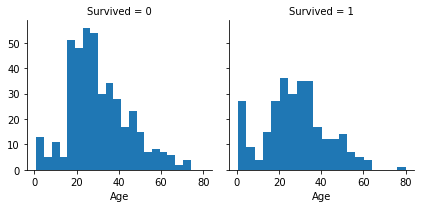

In [9]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [21]:
# handy ML packages
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import mean_squared_error
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#Fixing up data
train = train.drop('PassengerId',axis=1)
train = train.drop('Cabin',axis=1)
train = train.drop('Ticket',axis=1)
train = train.drop('Fare',axis=1)

test = test.drop('PassengerId', axis=1)
test = test.drop('Cabin',axis=1)
test = test.drop('Ticket',axis=1)
test = test.drop('Fare',axis=1)

gender = {"male":0, "female":1}
embark = {"S":0,"C":1,"Q":2}
all_data = [train, test]

for each in all_data:
    each['Sex']=each['Sex'].map(gender)
    each['Embarked']=each['Embarked'].fillna('S')
    each['Embarked']=each['Embarked'].map(embark)

for record in all_data:
    randAge=np.random.randint(train['Age'].mean() - train['Age'].std(), train['Age'].mean() + train['Age'].std(), size = record['Age'].isnull().sum())
    age_slice = record['Age'].copy()
    age_slice[np.isnan(record['Age'])] = randAge
    record['Age']=age_slice
    record['Age']=train['Age'].astype(int)

In [24]:
Y_train = train['Survived']
X_train = train.drop("Survived",axis=1)
X_test = test.copy()
X_test.info()
#X_train.shape, Y_train.shape, X_test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null int32
SibSp       418 non-null int64
Parch       418 non-null int64
Embarked    418 non-null int64
dtypes: int32(1), int64(5)
memory usage: 18.0 KB


Coefficients: [-0.18729965  0.50601732 -0.0057129  -0.03814866 -0.01289606  0.04122621]


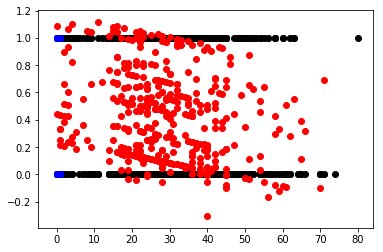

In [25]:
#set up ML model

## Linear Regression
lr = linear_model.LinearRegression()
lr.fit(X_train, Y_train)

y_pred = lr.predict(X_test)

print('Coefficients:',lr.coef_)

plt.scatter(X_train['Age'],Y_train,color='black')
plt.scatter(X_train['Sex'],Y_train,color='blue')
plt.scatter(X_test['Age'],y_pred,color='red')
plt.show()

In [ ]:
#Look at that mess of an LR graph... should have done binary...